In [1]:
%matplotlib inline
from __future__ import print_function, division
from neuralnilm.source import RandomSegments, RandomSegmentsInMemory, SameLocation
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np
from sys import stdout

In [2]:
source = SameLocation(
    filename='/data/mine/vadeec/merged/ukdale.h5',
    #target_appliance=['washer dryer', 'washing machine'],
    target_appliance=['fridge freezer', 'fridge'],
    #window=("2013-03-18", None),
    window=("2013-03-18", "2013-05-18"),
    #window=("2013-04-01", "2013-08-01"),
    seq_length=512,
    train_buildings=[1],#,2,3,4,5],
    validation_buildings=[1],#,2,3,4,5],
    n_seq_per_batch=4,
    standardise_input=True,
    independently_center_inputs=True,
    standardise_targets=True,
    subsample_target=8,
    #ignore_incomplete=True,
    skip_probability=0.5
    #offset_probability=0.5,
    #ignore_offset_activations=True
)

Loaded 1508 fridge freezer activations from house 1.


INFO:neuralnilm.source:Loaded 1508 fridge freezer activations from house 1.


Loaded mains data for building 1.


INFO:neuralnilm.source:Loaded mains data for building 1.


In [3]:
source.validation_buildings

[1]

In [4]:
source.train_buildings

[1]

In [5]:
def plot_data(X, y, seq_i=0):
    fig, axes = plt.subplots(nrows=2, sharex=False)
    axes[0].plot(y[seq_i, :, 0])
    axes[1].plot(X[seq_i, :, 0])
    plt.show()

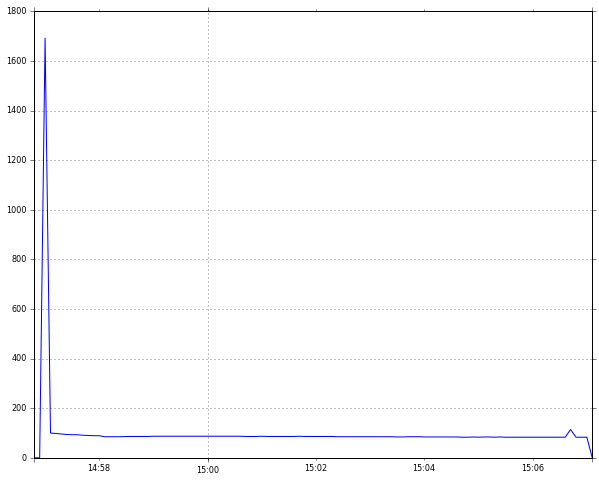

In [6]:
source.activations[1][13].plot()

In [7]:
len(source.activations[1])

1508

In [26]:
#source.n_seq_per_batch = 4
#source.skip_probability = 0.5
X_val, y_val = source.validation_data()

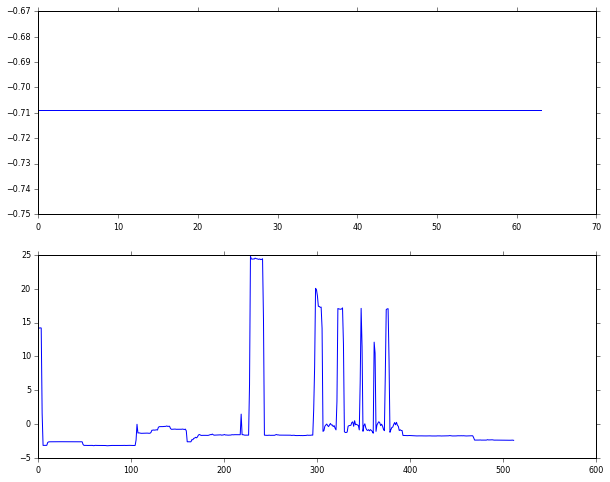

In [27]:
plot_data(X_val, y_val, 1)

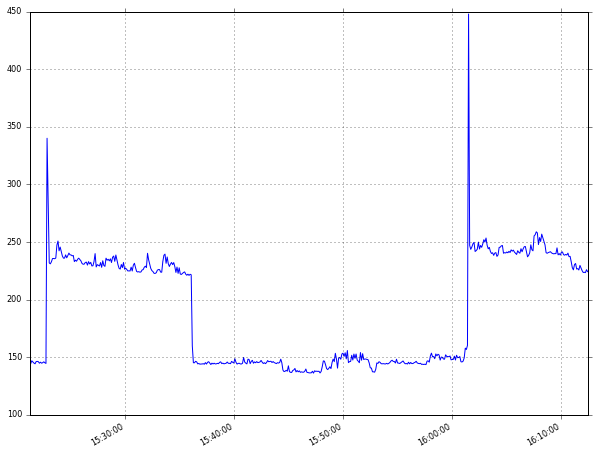

In [95]:
source.data[2]['mains']['2013-09-10 15:21:15+01:00':'2013-09-10 16:12:27+01:00'].plot()

In [97]:
fridge = source.dataset.buildings[2].elec['fridge'].power_series_all_data()

In [103]:
timeframes = source.dataset.buildings[2].elec['fridge'].good_sections()

In [106]:
type(timeframes)

nilmtk.timeframegroup.TimeFrameGroup

In [100]:
df = fridge['2013-09-10 15:21:15+01:00':'2013-09-10 16:12:27+01:00']

In [102]:
df.empty

True

In [19]:
from nilmtk.electric import activation_series_for_chunk

In [22]:
chunk = source.data[2]['target']['2013-09-15 23:15:35+01:00':'2013-09-16 00:06:47+01:00']

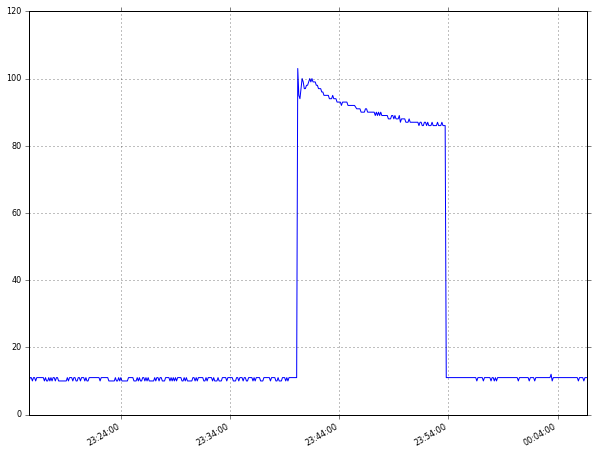

In [23]:
chunk.plot()

In [26]:
activations = activation_series_for_chunk(chunk, on_power_threshold=60)

In [27]:
activations

[2013-09-15 23:40:00+01:00     11
 2013-09-15 23:40:06+01:00     11
 2013-09-15 23:40:12+01:00    103
 2013-09-15 23:40:18+01:00     95
 2013-09-15 23:40:24+01:00     94
 2013-09-15 23:40:30+01:00     97
 2013-09-15 23:40:36+01:00    100
 2013-09-15 23:40:42+01:00     99
 2013-09-15 23:40:48+01:00     97
 2013-09-15 23:40:54+01:00     97
 2013-09-15 23:41:00+01:00     98
 2013-09-15 23:41:06+01:00     98
 2013-09-15 23:41:12+01:00     99
 2013-09-15 23:41:18+01:00    100
 2013-09-15 23:41:24+01:00     99
 2013-09-15 23:41:30+01:00    100
 2013-09-15 23:41:36+01:00     99
 2013-09-15 23:41:42+01:00     99
 2013-09-15 23:41:48+01:00     99
 2013-09-15 23:41:54+01:00     98
 2013-09-15 23:42:00+01:00     98
 2013-09-15 23:42:06+01:00     97
 2013-09-15 23:42:12+01:00     97
 2013-09-15 23:42:18+01:00     97
 2013-09-15 23:42:24+01:00     96
 2013-09-15 23:42:30+01:00     96
 2013-09-15 23:42:36+01:00     95
 2013-09-15 23:42:42+01:00     95
 2013-09-15 23:42:48+01:00     95
 2013-09-15 23

In [7]:
source.start()

In [17]:
source.output_shape_after_processing()

(2, 120, 1)

In [8]:
X, y = source.queue.get(timeout=5)

In [9]:
plot_data(X, y, 0)

In [18]:
i = 0
while True:
    print("\r", i, end="")
    stdout.flush()
    X, y = source.queue.get(timeout=5)
    if (X[0] == X_val[0]).all():
        print("ahhh!")
        break
    i += 1

 168629

KeyboardInterrupt: 

In [6]:
source.dataset.buildings[1].elec['washer dryer'].dominant_appliance().type

{'categories': {'electrical': ['single-phase induction motor', 'resistive'],
  'google_shopping': ['laundry appliances'],
  'size': 'large',
  'traditional': 'wet'},
 'components': [{'categories': {'electrical': ['single-phase induction motor']},
   'description': 'drum motor',
   'n_ancestors': 1,
   'parent': 'component',
   'type': 'motor'},
  {'categories': {'electrical': ['single-phase induction motor']},
   'n_ancestors': 2,
   'parent': 'motor',
   'type': 'water pump'},
  {'additional_properties': {'volume': {'description': 'litres',
     'type': 'number'}},
   'categories': {'electrical': ['resistive']},
   'n_ancestors': 2,
   'parent': 'electric heating element',
   'type': 'electric water heater'},
  {'categories': {'electrical': ['resistive']},
   'description': 'clothes drying heating element',
   'n_ancestors': 2,
   'parent': 'electric heating element',
   'type': 'electric air heater'}],
 'control': ['manual', 'timer'],
 'distributions': {'rooms': [{'distance': 3,
    

In [9]:
min([a.index[-1] - a.index[0] for a in source.activations[1]])

Timedelta('0 days 00:07:42')

In [46]:
(2*60*60) / 6

1200.0

In [3]:
elec = source.dataset.buildings[4].elec

In [4]:
washer = elec['washing machine']

In [5]:
data = washer.power_series_all_data()

In [6]:
data.plot()